In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('drive/MyDrive/Colab Notebooks/')

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))


11490434/11490434 [==============================] - 0s 0us/step


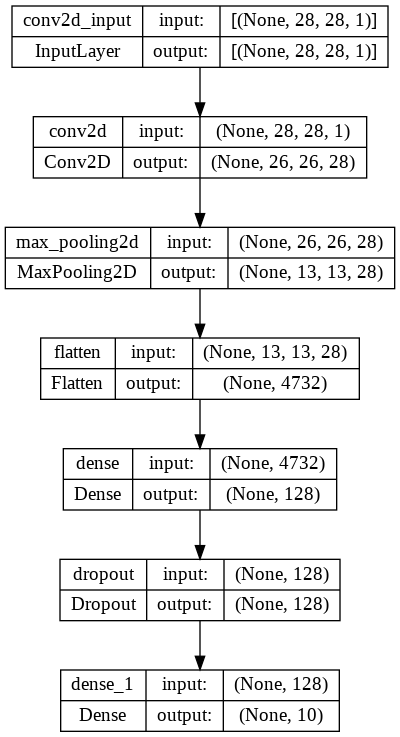

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
training_history = model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2048 - accuracy: 0.9378
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0848 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0571 - accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0456 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0342 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0298 - accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0265 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0228 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0197 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 38s 20m

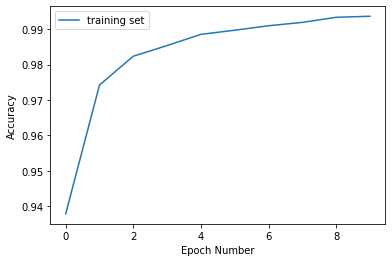

In [8]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.legend()

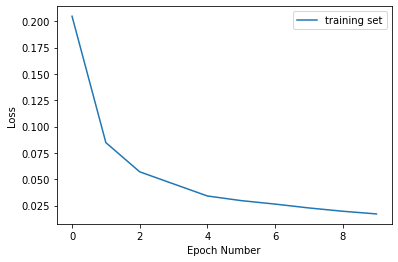

In [10]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.legend()

In [12]:
train_loss, train_accuracy = model.evaluate(x_test, y_test)
print('Loss: ', train_loss)
print('Accuracy: ', train_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.0613 - accuracy: 0.9851
Loss:  0.06128007173538208
Accuracy:  0.9850999712944031


In [13]:
model.save('number_detection_model.h5')